# Practice Problem: Identify the Sentiments
> Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Brands can use this data to measure the success of their products in an objective manner. In this challenge, you are provided with tweet data to predict sentiment on electronic products of netizens.

# Evaluation Metric
> The metric used for evaluating the performance of classification model would be **weighted F1-Score**.

In [1]:
import re
import string
import numpy as np
import pandas as pd

In [2]:
NON_STEM_WORDS =('apple','iphone','instapic','instadaily','sony')

In [3]:
from sklearn.feature_extraction import text
stopwords = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
stops =   stopwords.words('english')

In [4]:
from sklearn import metrics
from sklearn.metrics import roc_curve
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)) )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),)
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)))
    return y_pred

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    plt.figure()
    plt.title("Learning Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g" ,label="Cross-validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

from sklearn.model_selection import validation_curve
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    plt.figure()
    plt.title("Validation Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

def plot_roc(X_val,y_val,model):
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.title("roc_curve");
    # find threshold closest to zero:
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)
    plt.show()

def test_classifier(model,X,y,cv):
    clf = model.fit(X,y.values.ravel())
    result = clf.score(X,y.values)
    print ("Accuracy: {0:.3f}".format(result*100.0))

    train_sizes, train_scores, validation_scores = learning_curve(clf, X,y.values.ravel(),cv=cv)
    plot_learning_curve(train_sizes, train_scores, validation_scores)
    return clf,result

In [5]:
from nltk.stem.porter import PorterStemmer 
from nltk.stem import SnowballStemmer
#stemmer = PorterStemmer()
stemmer =SnowballStemmer('english')

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
def clean_row(row):
    temp_tweet= row['tweet']
    temp_tweet = re.sub(r'https?:\/\/.*\/[a-zA-Z0-9]*', '', temp_tweet)
    temp_tweet = re.sub(r'&amp;quot;|&amp;amp', '', temp_tweet)
    temp_tweet = re.sub(r'@[\w]*', '', temp_tweet)
    #temp_tweet = re.sub(r'#[a-zA-Z0-9]*', '', temp_tweet)
    return temp_tweet

In [8]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [9]:
def remove_shortwords(text):
    words = text.split()
    return " ".join([word for word in words if len(word.strip()) > 3 ])


In [10]:
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stops]
    return " ".join(words)

In [11]:
def stem_tweet(text):
    words = text.split()
    words = [ word if word in NON_STEM_WORDS else stemmer.stem(word) for word in words ]
    return " ".join(words)

In [12]:
def hashtag_extract(text):
    words = text.split()
    return " ".join([word  for word in words if word.startswith('#') ])

In [13]:
train_df = pd.read_csv('train.csv')

In [14]:
test_df = pd.read_csv('test.csv')

In [15]:
full_dataset = pd.concat([train_df,test_df],sort=False)

In [16]:
full_dataset.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...


In [17]:
def preprocess_df(df):
    df['tweet_length'] =df['tweet'].str.len()
    df['tweet'] = df['tweet'].str.lower()
    df['cleaned_tweet'] = df.apply(clean_row,axis=1) 
    df['hashtags'] =df['cleaned_tweet'].apply(hashtag_extract)
    df['cleaned_tweet'] = df['cleaned_tweet'].apply(remove_punctuations) 
    df['cleaned_tweet'] = df['cleaned_tweet'].apply(remove_shortwords)
    df['cleaned_tweet'] = df['cleaned_tweet'].apply(remove_stopwords)

    #df['cleaned_tweet'] = df['cleaned_tweet'].apply(stem_tweet) 
    
    return df

In [18]:
full_dataset = preprocess_df(full_dataset)

In [19]:
#full_dataset['cleaned_tweet'] = full_dataset['cleaned_tweet'].str.replace("[^a-zA-Z#]", " ")

In [20]:
full_dataset.head()

,id,label,tweet,tweet_length,cleaned_tweet,hashtags
0,1,0.0,#fingerprint #pregnancy test https://goo.gl/h1...,128,fingerprint pregnancy test android apps beauti...,#fingerprint #pregnancy #android #apps #beauti...
1,2,0.0,finally a transparant silicon case ^^ thanks t...,131,finally transparant silicon case thanks uncle ...,#yay #sony #xperia #s #sonyexperias…
2,3,0.0,we love this! would you go? #talk #makememorie...,123,love would talk makememories unplug relax ipho...,#talk #makememories #unplug #relax #iphone #sm...
3,4,0.0,i'm wired i know i'm george i was made that wa...,112,wired know george made iphone cute daventry home,#iphone #cute #daventry #home
4,5,1.0,what amazing service! apple won't even talk to...,124,amazing service apple wont even talk question ...,


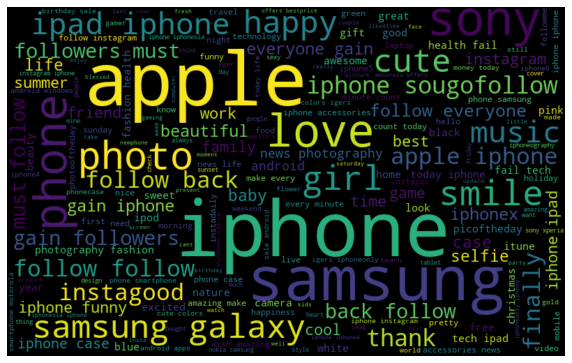

In [21]:
all_words_pos = ' '.join([text for text in full_dataset[full_dataset['label']==0]['cleaned_tweet'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_pos)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

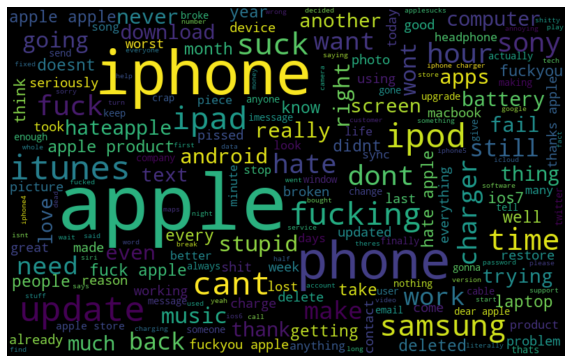

In [22]:
all_words_neg = ' '.join([text for text in full_dataset[full_dataset['label']==1]['cleaned_tweet'] ])
wordcloud_neg = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neg)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
full_dataset.to_csv('full_dataset.csv')

In [24]:
# def get_all_hashtags(rows):
#     hashtags =set()
#     for row in rows:
#         hashtags = hashtags | set(row.split())
#     return hashtags

# ht_pos = get_all_hashtags(full_dataset[full_dataset['label'] == 0]['hashtags'])

# import nltk
# import seaborn as sns

# ht_pos_freq = nltk.FreqDist(ht_pos)

# ht_pos_freq_df = pd.DataFrame({'Hashtag': list(ht_pos_freq.keys()),
#                   'Count': list(ht_pos_freq.values())})

# ht_pos_freq_df = ht_pos_freq_df.nlargest(columns="Count", n = 30) 
# plt.figure(figsize=(16,5))
# ax = sns.barplot(data=ht_pos_freq_df, x= "Hashtag", y = "Count")
# ax.set(ylabel = 'Count')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.show()

In [25]:
train_X = full_dataset[full_dataset['label'].notnull()]['cleaned_tweet']

In [26]:
train_y = full_dataset[full_dataset['label'].notnull()]['label']

In [27]:
test_X = full_dataset[full_dataset['label'].isnull()]['cleaned_tweet']

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [73]:
from sklearn.model_selection  import  train_test_split
test_size = 0.25
seed = 2
kfold = StratifiedKFold(n_splits=5)
X_trainmodel, X_val, y_trainmodel, y_val = train_test_split(train_X, train_y, test_size=test_size,random_state=seed)

In [74]:
model = Pipeline([('bow_vectorizer', bow_vectorizer),
                  ('transformer',transformer),
                  ('classifier', MultinomialNB())])

model.fit(X_trainmodel, y_trainmodel)

y_valp = model.predict(X_val)

best_model ,result = test_classifier(model,X_trainmodel,y_trainmodel,kfold)
print(best_model)
plot_roc(X_val,y_val,best_model)

In [57]:
from sklearn.metrics import f1_score, confusion_matrix

In [58]:
from sklearn import metrics

In [59]:
print(metrics.classification_report(y_val,y_valp))

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      1452
         1.0       0.77      0.70      0.74       528

    accuracy                           0.87      1980
   macro avg       0.83      0.81      0.82      1980
weighted avg       0.86      0.87      0.86      1980



In [60]:
y_test =model.predict(test_X)

In [42]:
submission_df = test_df.copy()
submission_df.drop(['tweet'],axis=1 ,inplace=True)
submission_df['label'] = y_test

In [47]:
submission_df.to_csv('submission.csv',index=False)

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

In [79]:
clfs = {
    'mnb': MultinomialNB(),
    #'gnb': GaussianNB(),
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    #'mlp1': MLPClassifier(),
    #'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [80]:
f1_scores = dict()
for clf_name,clf in clfs.items():
    print(clf_name)
    model = Pipeline([('bow_vectorizer', bow_vectorizer),('transformer',transformer),(clf_name, clf)])
    model.fit(X_trainmodel, y_trainmodel)
    y_pred_val = model.predict(X_val)
    f1_scores[clf_name] = f1_score(y_pred_val, y_val)
    print(f1_scores)

mnb
{'mnb': 0.7359050445103857}
svm1
{'mnb': 0.7359050445103857, 'svm1': 0.7346938775510204}
svm2


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'mnb': 0.7359050445103857, 'svm1': 0.7346938775510204, 'svm2': 0.0}
svm3


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


{'mnb': 0.7359050445103857, 'svm1': 0.7346938775510204, 'svm2': 0.0, 'svm3': 0.0}
ada
{'mnb': 0.7359050445103857, 'svm1': 0.7346938775510204, 'svm2': 0.0, 'svm3': 0.0, 'ada': 0.6459747817652765}
dtc
{'mnb': 0.7359050445103857, 'svm1': 0.7346938775510204, 'svm2': 0.0, 'svm3': 0.0, 'ada': 0.6459747817652765, 'dtc': 0.6347305389221557}
rfc


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'mnb': 0.7359050445103857, 'svm1': 0.7346938775510204, 'svm2': 0.0, 'svm3': 0.0, 'ada': 0.6459747817652765, 'dtc': 0.6347305389221557, 'rfc': 0.7041666666666666}
gbc
{'mnb': 0.7359050445103857, 'svm1': 0.7346938775510204, 'svm2': 0.0, 'svm3': 0.0, 'ada': 0.6459747817652765, 'dtc': 0.6347305389221557, 'rfc': 0.7041666666666666, 'gbc': 0.549618320610687}
lr
{'mnb': 0.7359050445103857, 'svm1': 0.7346938775510204, 'svm2': 0.0, 'svm3': 0.0, 'ada': 0.6459747817652765, 'dtc': 0.6347305389221557, 'rfc': 0.7041666666666666, 'gbc': 0.549618320610687, 'lr': 0.7082452431289642}


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
alpha_values = [i * 0.1 for i in range(11)]
max_f1_score = float('-inf')
best_alpha = None
for alpha in alpha_values:
    model = Pipeline([('bow_vectorizer', bow_vectorizer),
                  ('transformer',transformer),
                  ('classifier', MultinomialNB(alpha=alpha))])
    model.fit(X_trainmodel, y_trainmodel)
    y_pred_val = model.predict(X_val)
    current_f1_score = f1_score(y_pred_val, y_val)
    if current_f1_score > max_f1_score:
        max_f1_score = current_f1_score
        best_alpha = alpha


print(f'Best Alpha :{best_alpha}')

D:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best Alpha :0.2


Accuracy: 90.387


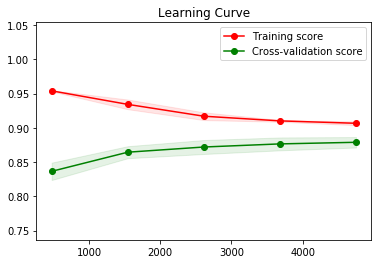

Pipeline(memory=None,
         steps=[('bow_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.9,
                                 max_features=1000, min_df=2,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('transformer',
                 TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=True,
                                  use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True))],
         verbose=False)


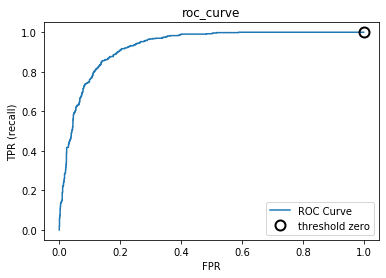

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      1452
         1.0       0.76      0.73      0.75       528

    accuracy                           0.87      1980
   macro avg       0.83      0.83      0.83      1980
weighted avg       0.87      0.87      0.87      1980



In [86]:
model = Pipeline([('bow_vectorizer', bow_vectorizer),
                  ('transformer',transformer),
                  ('classifier', MultinomialNB(alpha=0.2))])

model.fit(X_trainmodel, y_trainmodel)

y_valp = model.predict(X_val)

best_model ,result = test_classifier(model,X_trainmodel,y_trainmodel,kfold)
print(best_model)
plot_roc(X_val,y_val,best_model)
print(metrics.classification_report(y_val,y_valp))